#kMeans clustering

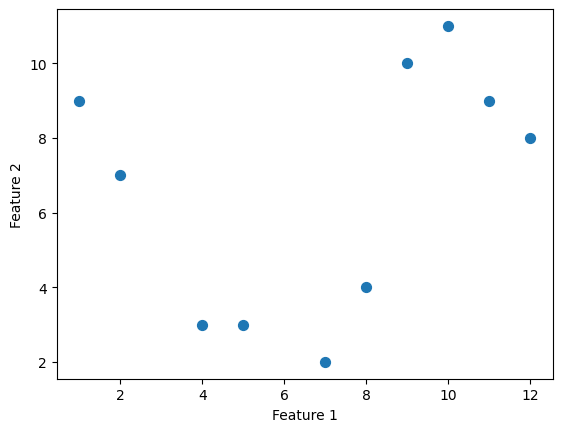

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X=np.array([[1,9],[2,7],[4,3],[5,3],[7,2],[8,4],[10,11],[11,9],[9,10],[12,8]])
#visualling the data
plt.scatter(X[:,0],X[:,1],s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
#get cluster labels & centroids
y_kmeans=kmeans.labels_
print(y_kmeans)
centroids=kmeans.cluster_centers_
print(centroids)

[2 2 0 0 0 0 1 1 1 1]
[[ 6.   3. ]
 [10.5  9.5]
 [ 1.5  8. ]]


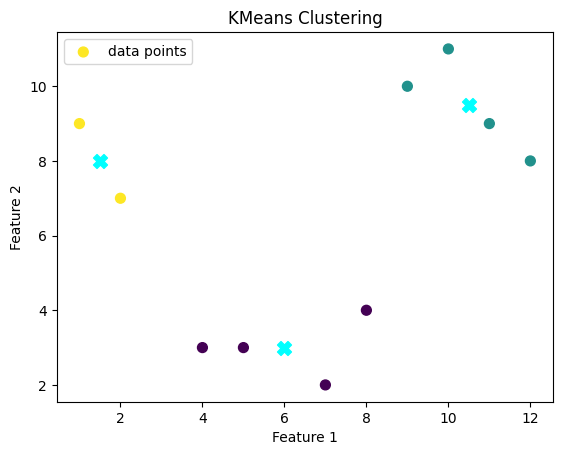

In [ ]:
#ploting the data with their ckuster assisgments
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='viridis',s=50,label="data points")
plt.scatter(centroids[:,0],centroids[:,1],c='cyan',marker='X',s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering")
plt.legend()
plt.show()

# Using numpy

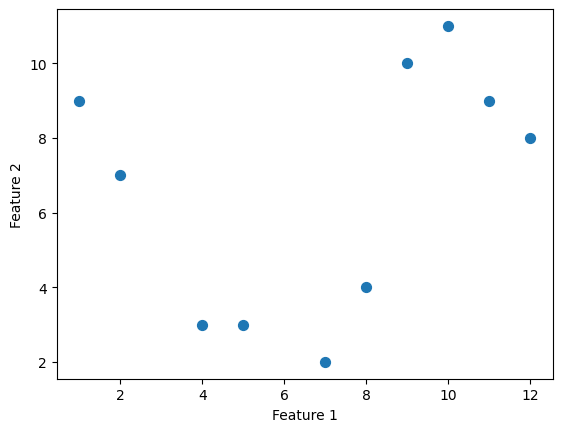

In [ ]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
class KMeans:
    def __init__(self, k=5, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.clusters = [[] for _ in range(self.k)]#creating k no of lists for clusters
        self.centroids = []#the centers (mean vetor) for each cluster
    def fit(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        #initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        #optimize centroids
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)#assign samples to closest centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._is_converged(centroids_old, self.centroids):
                break
        #return cluster labels
        return self._get_cluster_labels(self.clusters)
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        print(centroids.shape)
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        #distance between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        plt.show()
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
plt.scatter(X[:,0],X[:,1],s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()





In [ ]:
kmeans=KMeans(k=3,max_iters=150)
y_pred=kmeans.fit(X)
print(y_pred)

(3, 2)
(3, 2)
(3, 2)
(3, 2)
[0. 0. 2. 2. 2. 2. 1. 1. 1. 1.]


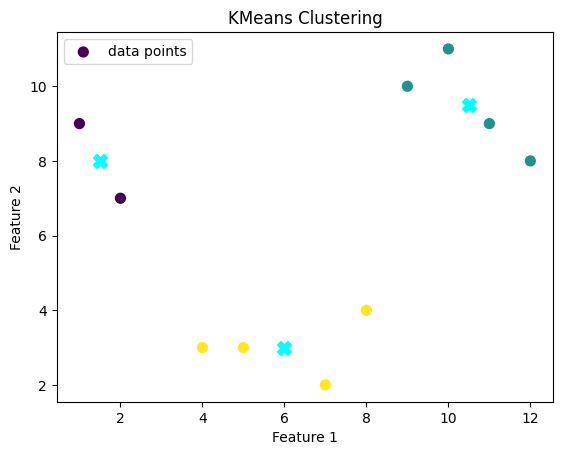

In [ ]:
#ploting the data with their ckuster assisgments
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='viridis',s=50,label="data points")
plt.scatter(centroids[:,0],centroids[:,1],c='cyan',marker='X',s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering")
plt.legend()
plt.show()